# Task 3: Heart Disease Prediction

### Problem Statement
Heart disease is one of the leading causes of death worldwide. Early detection of individuals at risk can help in timely medical intervention 
and prevention. However, manual analysis of multiple medical parameters is time-consuming and prone to error. Therefore, an automated system is required 
to analyze patient health data and accurately predict the presence of heart disease.

### Objective
To build a machine learning classification model that predicts whether a person 
is at risk of heart disease based on medical and health-related data.

### Dataset
- The dataset used for this task is the Heart Disease UCI dataset, obtained from Kaggle. 
- It contains medical and clinical attributes of patients such as age, sex, chest pain type, resting blood pressure, cholesterol level, fasting blood sugar, maximum heart rate achieved, and other related health indicators. 
- The target variable indicates whether a person has heart disease (1) or not (0) 


# Installation and Import of Important Libraries


In [61]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



- We import all necessary libraries for data fetching, processing, visualization, and modeling.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc


## Load the Dataset

In [63]:
# Load the dataset
data = pd.read_csv("heart.csv")

# Show first 5 rows
data.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


## Data Preprocessing
- Check for missing values
- Remove null values
- Split data into features and target


In [72]:

pd.set_option('display.max_rows', None)  # Ensure all rows are shown


# Check data types
print(data.dtypes)

# Check missing values
print(data.isnull().sum())
pd.set_option('display.max_rows', None)

print(data['sex'].unique())
print(data['chest_pain_type'].unique())
print(data['fasting_blood_sugar'].unique())
print(data['rest_ecg'].unique())
print(data['slope'].unique())
print(data['exercise_induced_angina'].unique())
print(data['vessels_colored_by_flourosopy'].unique())
print(data['thalassemia'].unique())

categorical_cols = [
    'sex',
    'chest_pain_type',
    'fasting_blood_sugar',
    'rest_ecg',
    'slope',
    'exercise_induced_angina',
    'vessels_colored_by_flourosopy',
    'thalassemia']
data_numeric = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Check the first 5 rows
data_numeric.head()

# Define features and target
X = data_numeric.drop('target', axis=1)
y = data_numeric['target']
data_numeric.head()

age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object
age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flouroso

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target,sex_Male,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,...,slope_Flat,slope_Upsloping,exercise_induced_angina_Yes,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
0,52,125,212,168,1.0,0,True,False,False,True,...,False,False,False,False,False,True,False,False,False,True
1,53,140,203,155,3.1,0,True,False,False,True,...,False,True,True,False,False,False,True,False,False,True
2,70,145,174,125,2.6,0,True,False,False,True,...,False,True,True,False,False,False,True,False,False,True
3,61,148,203,161,0.0,0,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,62,138,294,106,1.9,0,False,False,False,True,...,True,False,False,False,True,False,False,False,False,False


## Data Visualization

### Count Plot & Heatmap

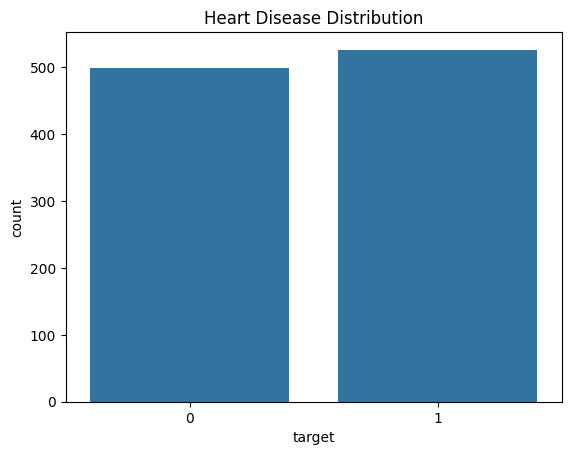

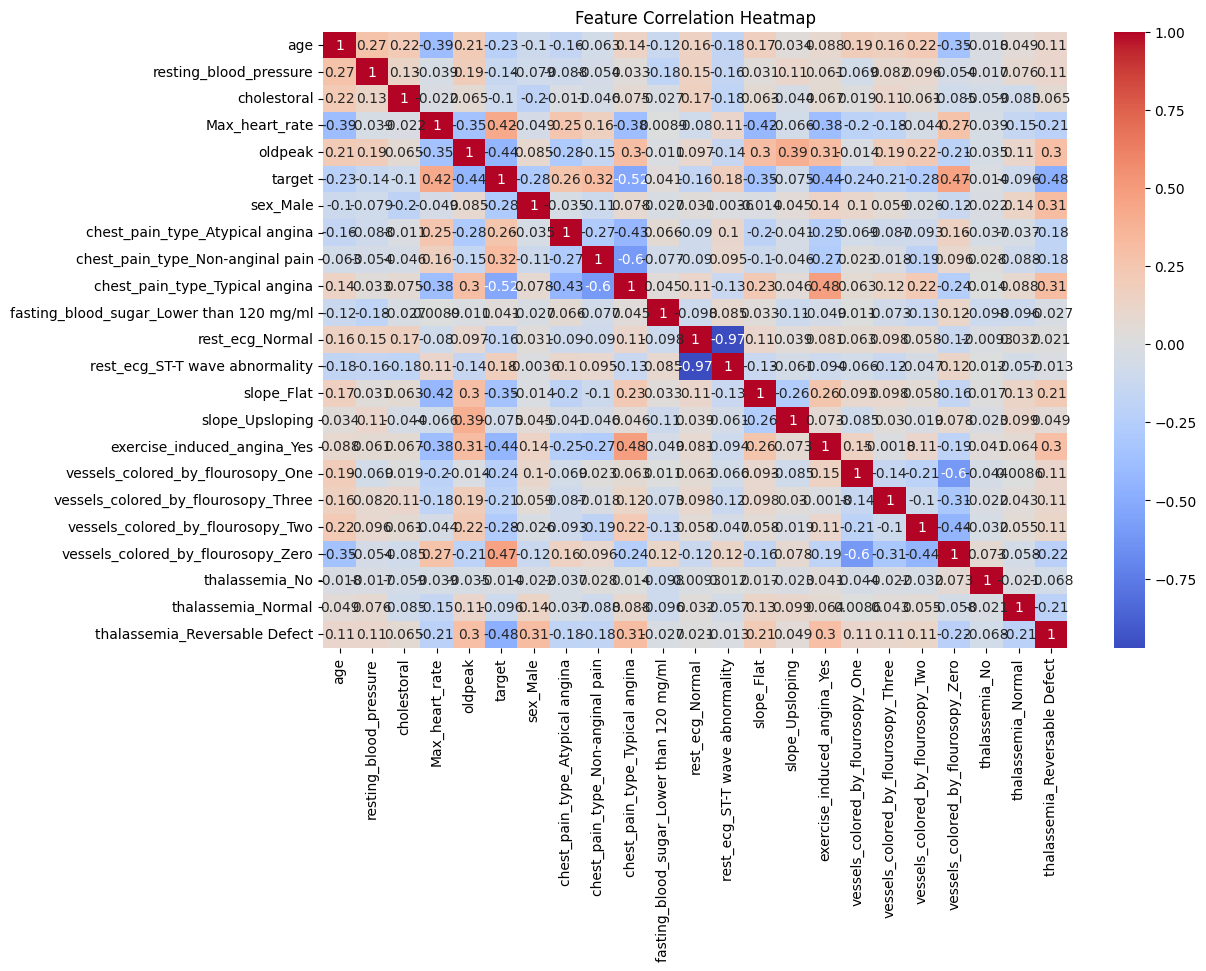

In [74]:
# Target distribution
sns.countplot(x='target', data=data_numeric)
plt.title("Heart Disease Distribution")
plt.show()



# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()



## Train-Test Split
Split data into 80% training and 20% testing sets.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Model Training
Train Logistic Regression and Decision Tree classifiers.


In [76]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:,1]

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)


Logistic Regression Accuracy: 0.8146341463414634


c:\Users\faraz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Code (Decision Tree)

In [77]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)


Decision Tree Accuracy: 0.9853658536585366


## Confusion Matrix
Visualize confusion matrix for Logistic Regression predictions.

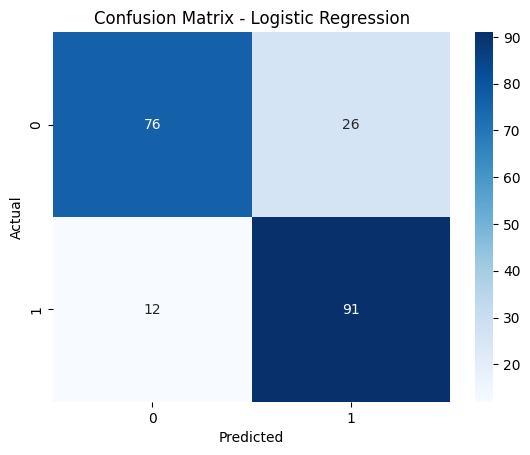

In [78]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### ROC Curve & AUC
Evaluate model performance across thresholds.

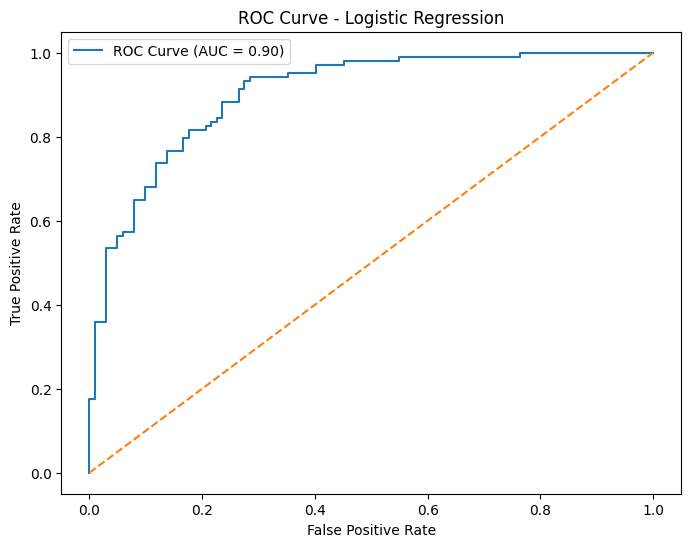

In [79]:
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

## Feature Importance
Analyze which features contribute most to the prediction.

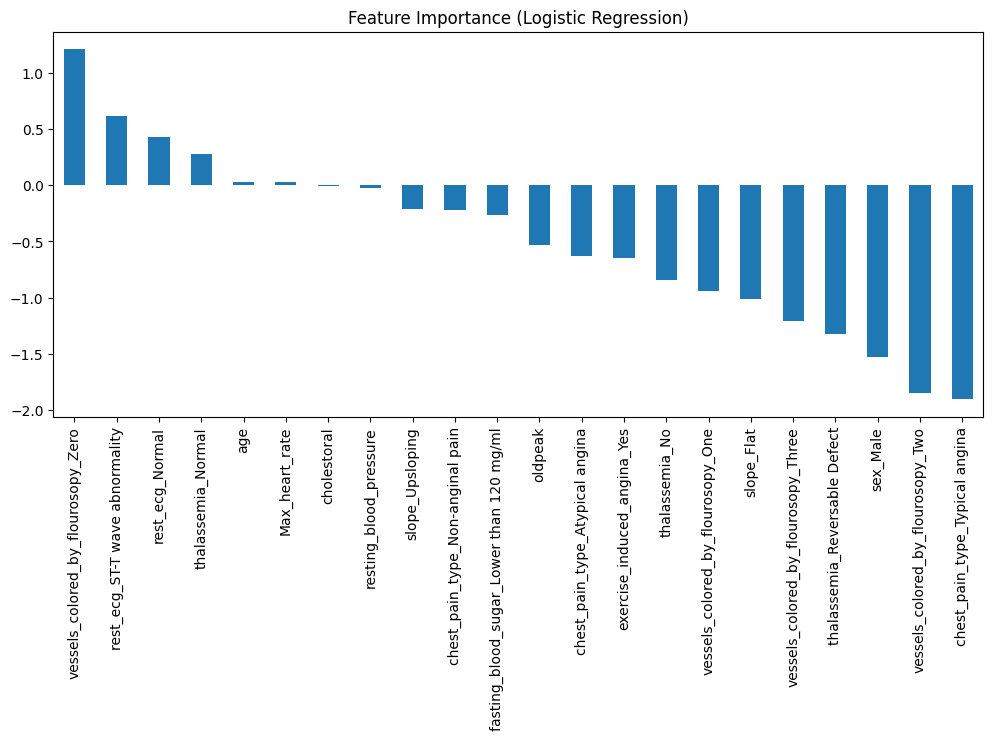

In [80]:
# Logistic Regression coefficients
feature_importance = pd.Series(lr_model.coef_[0], index=X.columns).sort_values(ascending=False)

feature_importance.plot(kind='bar', figsize=(12,5))
plt.title("Feature Importance (Logistic Regression)")
plt.show()


### Final Insights & Observations

- Logistic Regression is interpretable and stable.
- Decision Tree captures complex patterns but may overfit.
- ROC-AUC shows strong classification capability.
- Chest pain, cholesterol, age, and max heart rate are key predictors.

## Conclusion
***Machine learning models can predict heart disease risk effectively using patient data. 
Logistic Regression provides reliable predictions and interpretability, aiding early diagnosis.***
